Using TensorFlow backend.


(-0.05, 1.05, -0.05, 1.05)

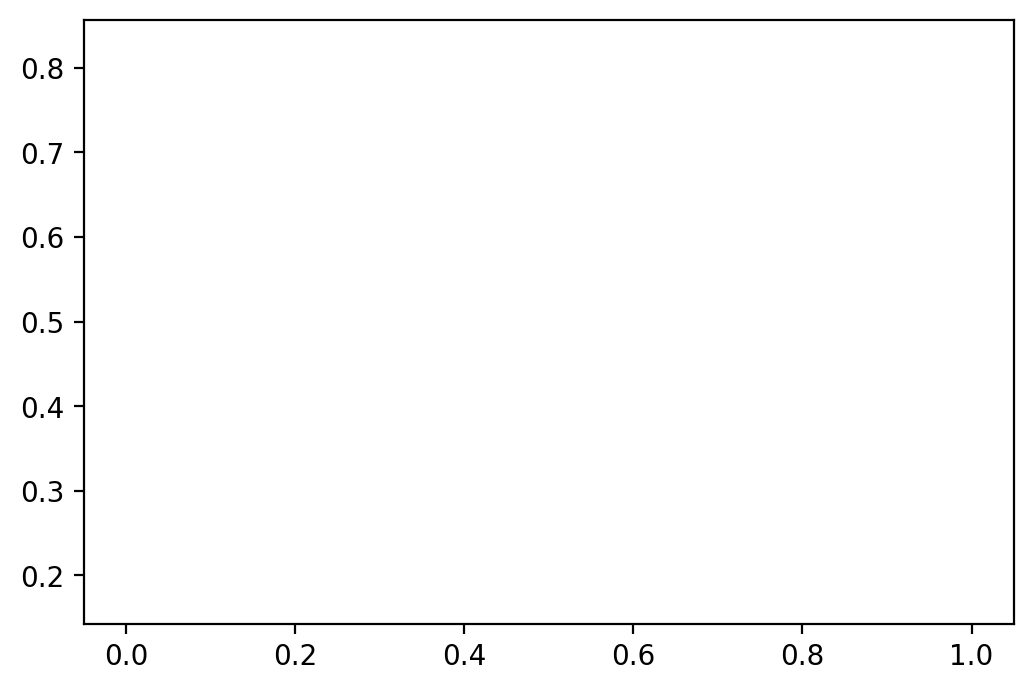

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100
plt.ion()
plt.axis('equal')


In [55]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=50000, test_size=10000)
print(x_train.shape)
print(x_validation.shape)


(60000, 28, 28)
(50000, 28, 28)
(10000, 28, 28)


In [56]:
batch_size = 128
num_classes = 10
epochs = 20

In [58]:
x_train = x_train.reshape(50000, 784)
x_test = x_test.reshape(10000, 784)
x_validation = x_validation.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_validation = x_validation.astype('float32')

x_train /= 255
x_test /= 255
x_validation /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(x_validation.shape, 'validation samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)



(50000, 784) train samples
(10000, 784) test samples
(10000, 784) validation samples


In [73]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

optimizer = SGD()
%time model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])



CPU times: user 21.2 ms, sys: 32 µs, total: 21.2 ms
Wall time: 21.3 ms


In [64]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_validation, y_validation))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.3473 - acc: 0.6681 - val_loss: 0.7737 - val_acc: 0.8220
Epoch 2/20
50000/50000 [==============================] - 1s 28us/step - loss: 0.6283 - acc: 0.8489 - val_loss: 0.5302 - val_acc: 0.8642
Epoch 3/20
50000/50000 [==============================] - 1s 27us/step - loss: 0.4829 - acc: 0.8745 - val_loss: 0.4471 - val_acc: 0.8812
Epoch 4/20
50000/50000 [==============================] - 1s 27us/step - loss: 0.4206 - acc: 0.8872 - val_loss: 0.4039 - val_acc: 0.8913
Epoch 5/20
50000/50000 [==============================] - 1s 28us/step - loss: 0.3846 - acc: 0.8947 - val_loss: 0.3770 - val_acc: 0.8981
Epoch 6/20
50000/50000 [==============================] - 1s 28us/step - loss: 0.3605 - acc: 0.8999 - val_loss: 0.3579 - val_acc: 0.9031
Epoch 7/20
50000/50000 [==============================] - 1s 28us/step - loss: 0.3426 - acc: 0.9044 - val_loss: 0.3436 - val_acc

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.save_weights("kera-mnist.model")

In [72]:
del(model)

In [74]:
model.load_weights("kera-mnist.model")

In [76]:
h.history

{'val_loss': [0.7737270311355591,
  0.5301823482513428,
  0.4471431276321411,
  0.40394588050842284,
  0.37700388765335086,
  0.35793765964508056,
  0.34358514862060546,
  0.3316106972694397,
  0.3216798786640167,
  0.3131615466117859,
  0.3060393949508667,
  0.29857774686813354,
  0.29231777696609496,
  0.2863374164104462,
  0.28050107707977295,
  0.27550745000839233,
  0.27000956134796145,
  0.26598679094314576,
  0.26158219895362855,
  0.2569021275997162],
 'val_acc': [0.822,
  0.8642,
  0.8812,
  0.8913,
  0.8981,
  0.9031,
  0.907,
  0.9102,
  0.9129,
  0.9137,
  0.9166,
  0.9186,
  0.92,
  0.9213,
  0.9232,
  0.9241,
  0.9249,
  0.9256,
  0.9268,
  0.9281],
 'loss': [1.3472543181991576,
  0.6282803330230713,
  0.48292519258499145,
  0.42060249113082887,
  0.38455409435272214,
  0.3604633828163147,
  0.34255595325469973,
  0.3282888368415833,
  0.31637850059509276,
  0.3062221389389038,
  0.29710700233459475,
  0.2890894907808304,
  0.2816006118488312,
  0.27470294596672057,
  0.2

In [75]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23671838354617358
Test accuracy: 0.9338


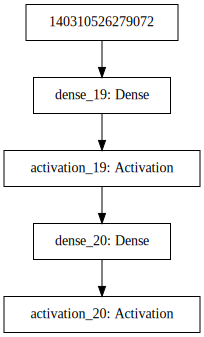

In [77]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
plt.axis('equal')
plt.pcolor(np.reshape(x_train[5], [28, 28]))